In [3]:
import networkx as nx
import community #networkX extension for community detecion
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

### NetworkX has some built in famous graphs, the Zachary Karate club is well-kown among sociologits

In [6]:
G=nx.karate_club_graph() #read as a graph

In [8]:
# The community package is an extension of networkX, the Louvain Modularity is one of the most used algorithm in community detection
# More info: https://en.wikipedia.org/wiki/Louvain_Modularity
part = community.best_partition(G) #calculate best parttion for each node
values = [part.get(node) for node in G.nodes()]
counterx=Counter(values)

### Non-overlapped communities

LOUVAIN COMMUNITY DETECTION BASED GRAPH


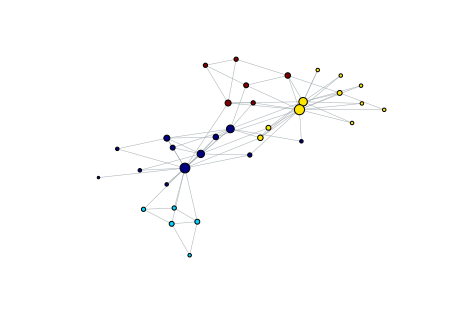

Number of communities by the Louven method: 4
Modularity: 0.418803418803


In [202]:
print 'LOUVAIN COMMUNITY DETECTION BASED GRAPH'

#Visualization with networkX
pos=nx.fruchterman_reingold_layout(G, scale=2)  #Fruchterman-Reingold force-directed algorithm
#See more: https://en.wikipedia.org/wiki/Force-directed_graph_drawing
nx.draw(G, pos=pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values, 
        edge_color='#A6AFB4', 
        width=0.5 ,
        node_size=[i*6 for i in G.degree().values()], #Node size based on the number of connections
        with_labels=False)
plt.show()
print 'Number of communities by the Louven method: '+str(len(counterx.keys()))
print 'Modularity: '+str(community.modularity(part, G)) 
#Modularity: defined as a value between -1 and 1 that measures the density of links inside communities compared to links between communities

## K-clique Communities

In [255]:
#Founding the overlapped nodes
found_communities = list(nx.k_clique_communities(G, 4))
l=[]
overlapped=defaultdict(int)
for i in c:
    l.extend([k for k in i])   
for i,k in dict(Counter(l)).iteritems():
    if k>1:
        overlapped[i]=5

In [243]:
#Detecting non-overlapping nodes
node_color=defaultdict(int)
com=0
c=nx.k_clique_communities(G, 4)
for i in nx.k_clique_communities(G, 4):
    for k in i:
        node_color[k]=com
    com+=1
node_color=dict(node_color)
non_clustered=set(G.nodes())-set([i for i in node_color.keys()])

In [244]:
#Nodes not belonging to any community
nc=defaultdict(int)
for i in non_clustered:
    nc[i]=4

In [245]:
node_color.update(overlapped)
node_color.update(nc)

K-Clique - overlapped communities


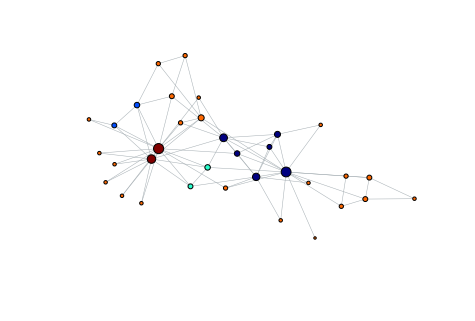

Number of communities by the K-clique percolation method: 4
Modularity: 0.0719921104536


Found overlapped communities:
(nodes with orange color do not belong to any detected community)
[frozenset([0, 1, 2, 3, 7, 13]), frozenset([32, 33, 29, 23]), frozenset([32, 33, 30, 8])]


In [256]:
print 'K-Clique - overlapped communities' #Visualizing the result
values2 = [node_color.get(node) for node in G.nodes()]
counterx2=Counter(values2)
pos=nx.fruchterman_reingold_layout(G, scale=20)
nx.draw(G, pos=pos, 
        cmap = plt.get_cmap('jet'), 
        node_color = values2, 
        edge_color='#A6AFB4', 
        width=0.5 ,
        node_size=[i*6 for i in G.degree().values()], 
        with_labels=False)
plt.show()
print 'Number of communities by the K-clique percolation method: '+str(len(counterx2.keys())-1)
print 'Modularity: '+str(community.modularity(node_color, G)) 
print '\n'
print 'Found overlapped communities:'
print '(nodes with orange color do not belong to any detected community)'
print found_communities

### Interactive graphs wth Lightning

In [2]:
import os
from lightning import Lightning
from numpy import random, asarray, linspace, corrcoef
from colorsys import hsv_to_rgb
from sklearn import datasets


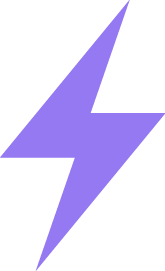

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [4]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
#Read more about lightning: http://lightning-viz.org/

In [10]:
mat = nx.adjacency_matrix(G).todense()
n=G.number_of_nodes()
c = [list(asarray(hsv_to_rgb(float(y)/4, 0.8, 1.0))*255) for x,y in part.iteritems()]
g = G.degree().values()
lgn.force(mat, color=c, size=(asarray(g) + 1.5))
#U can zoom in!